<a href="https://colab.research.google.com/github/varshini0317/Knee-X-Ray-Analysis/blob/main/ResNet%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import models
from PIL import Image

In [2]:
num_classes = 5  # Change this if you have more or fewer classes

In [3]:
# Step 2: Load your trained model
model = models.resnet18(weights='IMAGENET1K_V1')  # Load a pretrained ResNet model
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)  # Adjust the output layer
model.load_state_dict(torch.load('/content/model.pth'))  # Load your trained model weights
model.eval()

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 131MB/s]
<ipython-input-3-0774b1e234bc>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
# Step 3: Define transformations for the input images
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.ToTensor(),  # Convert image to tensor
])

In [5]:
# Step 4: Load your CSV file
csv_file_path = '/content/multilabel_missing-filled.csv'  # Replace with your actual CSV path
data = pd.read_csv(csv_file_path)
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        image = Image.open(img_path).convert('RGB')  # Open the image
        image = data_transforms(image)  # Apply transformations
        images.append(image)
    return torch.stack(images)  # Return a batch of images

In [6]:
data.head()  # Check the paths in the CSV

,id,side,subset,filename,kl_grade,osteophytes,jsn,osfl,scfl,cyfl,...,cytm,attm,osfm,scfm,cyfm,ostl,sctl,cytl,attl,actual_path
0,9000099,L,train,9000099L.png,3,def,severe,2.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
1,9000099,R,train,9000099R.png,2,def,mild/mod,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
2,9000296,L,train,9000296L.png,3,poss,def,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
3,9000296,R,train,9000296R.png,2,def,none,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...
4,9000622,L,train,9000622L.png,1,none,none,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/kaggle/input/knee-osteoarthritis-dataset-with...


In [7]:
# Step 5: Prepare DataLoader for predictions
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        # Construct full path if necessary
        full_path = img_path  # If paths in CSV are absolute
        # Uncomment the line below if your paths are relative and you need to construct them
        # full_path = os.path.join('/kaggle/input/knee-osteoarthritis-dataset-with-severity', img_path)  # Adjust the base path if necessary

        # Check if the path exists
        if not os.path.exists(full_path):
            print(f"Image not found: {full_path}")  # Print an error if the image is not found
            continue  # Skip to the next image

        image = Image.open(full_path).convert('RGB')  # Open the image
        image = data_transforms(image)  # Apply transformations
        images.append(image)
    return torch.stack(images)  # Return a batch of images


In [9]:
# Class mapping for output labels
class_mapping = {
    0: "None",
    1: "Doubtful",
    2: "Minimal",
    3: "Moderate",
    4: "Severe"
}

def predict_image_class(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')  # Open the image
    image = data_transforms(image).unsqueeze(0)  # Add batch dimension

    # Make predictions
    with torch.no_grad():  # Disable gradient calculations for inference
        outputs = model(image)  # Get model predictions

    predicted_class = torch.argmax(outputs, dim=1).item()  # Get the predicted class index
    predicted_label = class_mapping.get(predicted_class, "Unknown")  # Map to human-readable label
    return predicted_class, predicted_label  # Return both class index and label

# Example usage
image_path = '/content/9000296R.png'  # Replace with your image path
predicted_class, predicted_label = predict_image_class(image_path)
print(f"Predicted class index: {predicted_class}, Predicted label: {predicted_label}")


Predicted class index: 2, Predicted label: Minimal


<ipython-input-14-2176eb7d0a0b>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/model.pth'))  # Load your trained model weights


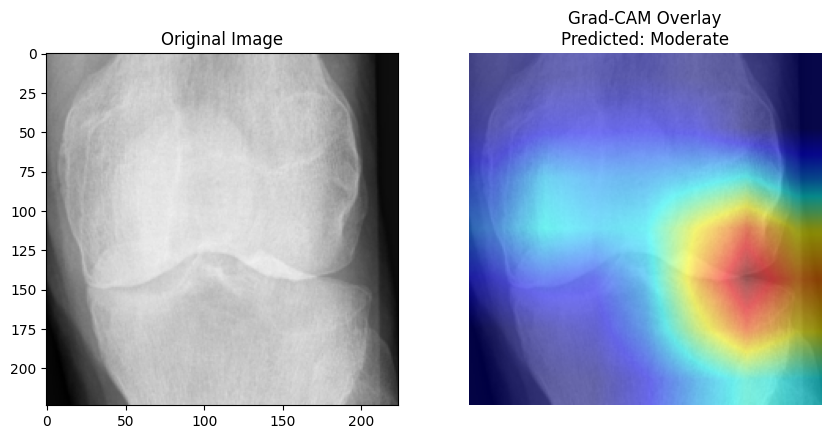

In [14]:
import pandas as pd
import os
import torch
from torchvision import transforms, models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV for color mapping

# Number of classes
num_classes = 5

# Step 2: Load your trained model
model = models.resnet18(weights='IMAGENET1K_V1')  # Load a pretrained ResNet model
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)  # Adjust the output layer
model.load_state_dict(torch.load('/content/model.pth'))  # Load your trained model weights
model.eval()

# Step 3: Define transformations for the input images
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.ToTensor(),  # Convert image to tensor
])

# Class mapping for output labels
class_mapping = {
    0: "None",
    1: "Doubtful",
    2: "Minimal",
    3: "Moderate",
    4: "Severe"
}

# Grad-CAM implementation
def generate_grad_cam(model, image_tensor, target_layer_name):
    gradients = []
    activations = []

    def backward_hook(module, grad_in, grad_out):
        gradients.append(grad_out[0])

    def forward_hook(module, input, output):
        activations.append(output)

    # Register hooks to capture gradients and activations
    target_layer = dict(model.named_children())[target_layer_name]
    target_layer.register_forward_hook(forward_hook)
    target_layer.register_backward_hook(backward_hook)

    # Forward pass
    outputs = model(image_tensor.unsqueeze(0))
    predicted_class = torch.argmax(outputs, dim=1).item()

    # Backward pass for Grad-CAM
    model.zero_grad()
    class_score = outputs[0, predicted_class]
    class_score.backward()

    # Compute Grad-CAM
    gradient = gradients[0].cpu().data.numpy()
    activation = activations[0].cpu().data.numpy()

    weights = np.mean(gradient, axis=(2, 3))  # Global average pooling on gradients
    cam = np.sum(weights[:, :, np.newaxis, np.newaxis] * activation, axis=1)[0]

    # Normalize Grad-CAM
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam, predicted_class

# Function to overlay Grad-CAM on the image
def overlay_grad_cam_on_image(image, cam):
    """
    Overlay Grad-CAM heatmap on the input image.
    """
    # Resize the Grad-CAM heatmap to match the image size
    cam_resized = cv2.resize(cam, (image.size[0], image.size[1]))  # Resize to match the original image dimensions

    # Normalize the resized heatmap
    cam_resized = np.uint8(255 * cam_resized)

    # Apply a colormap
    heatmap = cv2.applyColorMap(cam_resized, cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Convert the image to NumPy array
    image = np.asarray(image)
    if image.max() > 1:
        image = image / 255.0  # Normalize to [0, 1] if needed

    # Blend the heatmap and image
    overlayed_image = heatmap / 255.0 + image  # Blend heatmap and image
    overlayed_image = overlayed_image / overlayed_image.max() * 255.0  # Normalize
    return np.uint8(overlayed_image)

# Example usage with Grad-CAM
image_path = '/content/9026695L.png'  # Replace with your image path
image = Image.open(image_path).convert('RGB')
input_tensor = data_transforms(image)

cam, predicted_class = generate_grad_cam(model, input_tensor, target_layer_name="layer4")
predicted_label = class_mapping.get(predicted_class, "Unknown")

# Overlay Grad-CAM on the original image
overlayed_image = overlay_grad_cam_on_image(image, cam)

# Display the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title(f"Grad-CAM Overlay\nPredicted: {predicted_label}")
plt.imshow(overlayed_image)
plt.axis('off')
plt.show()
